In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import minimize

To calculate these errors, we overlay two of the same eigenmode, normalize them, and then find the root mean squared difference.

In [2]:
eigenmode_data_filenames = [
    'data/15_710_718_0.2.npy',
    'data/15_711_717_0.2.npy',
    'data/15_711_717_1.0.npy']
eigenmode_data = [np.load(filename) for filename in eigenmode_data_filenames]

Now we calculate the index where each file should have its 712 Hz data:

In [3]:
indices_of_712_Hz = [
    np.argmin(np.abs(np.arange(710, 718.01, 0.2)-712.0)),
    np.argmin(np.abs(np.arange(711, 717.01, 0.2)-712.0)),
    np.argmin(np.abs(np.arange(711, 717.01, 1.0)-712.0))]

Here are all the maps at the same frequency:

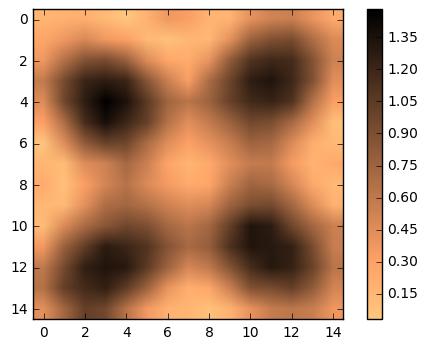

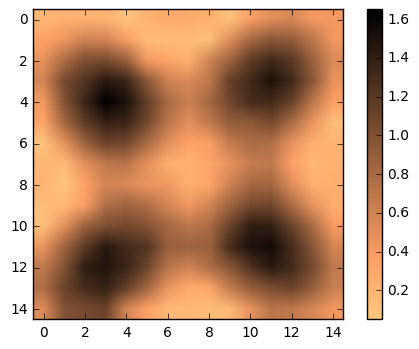

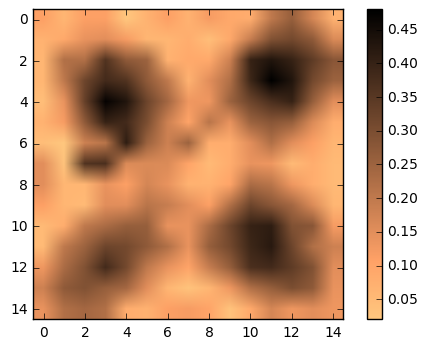

In [4]:
for i in range(3):
    plt.imshow(eigenmode_data[i][:, :, indices_of_712_Hz[i]], cmap='copper_r')
    plt.colorbar()
    plt.show()

Now, let's normalize them, and get a standard deviation for each. 

In [5]:
equal_frequency_data = [eigenmode_data[i][:, :, indices_of_712_Hz[i]] for i in range(3)]
normalized_maps = np.array([equal_frequency_data[i]/np.sum(equal_frequency_data[i]) for i in range(3)])

Then, we weight the standard deviation by the amplitude in an average over the whole plate (i.e., larger amplitude values should have better estimates for the amplitude uncertainty).

In [6]:
normalized_standard_deviation_pointwise = np.std(normalized_maps, 0)/np.average(normalized_maps, 0)
standard_deviation_pointwise = np.std(normalized_maps, 0)
weighted_average_standard_deviation = np.average(
    normalized_standard_deviation_pointwise,weights=np.average(normalized_maps, 0))

So, we find the amplitude relative error to be:

In [7]:
weighted_average_standard_deviation

0.11455035744440006

So about 10% relative error. For global average, we get, for a map which is normalized to be 1:

In [8]:
np.average(standard_deviation_pointwise)

0.00050911269975288914

The fact that this is larger seems reasonable because smaller amplitude values would likely have higher standard deviations. 

Is the absolute standard deviation in amplitude:

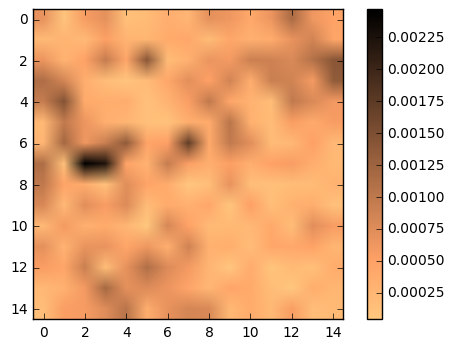

In [11]:
plt.imshow(standard_deviation_pointwise, cmap='copper_r')
plt.colorbar()

And here is the relative standard deviation in amplitude:

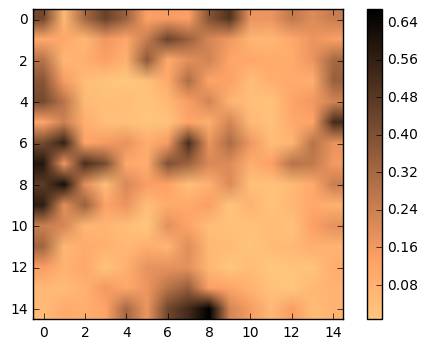

In [12]:
plt.imshow(normalized_standard_deviation_pointwise, cmap='copper_r')
plt.colorbar()

So it looks like taking the absolute standard deviation (0.0005 across the board for a normalized map) is a better assumption. It will not blow up over big areas, but is more uniform and lacking in structure (the relative map, it is obvious that the standard deviation about the edges is much larger than about the modes themselves)

Here is the absolute error in amplitude units:

In [19]:
np.sum(equal_frequency_data[1])*0.0005

0.080534999999999995

So the amplitude for any map should have an uncertainty of about 0.08. 